In [1]:
#task one
import pandas as pd
import simplejson as json
#read in csv
df = pd.read_csv('data.csv',encoding='utf-8-sig',thousands=',');
#aggregate
df_new = df.groupby(['Track Name','Artist']).sum();
#top 10
df_new.nlargest(10,['Streams'])

,,Position,Streams
Track Name,Artist,,
Shape of You,Ed Sheeran,301513,2993988783
Despacito - Remix,Luis Fonsi,477232,1829621841
Despacito (Featuring Daddy Yankee),Luis Fonsi,816152,1460802540
Something Just Like This,The Chainsmokers,725122,1386258295
HUMBLE.,Kendrick Lamar,854060,1311243745
Unforgettable,French Montana,667424,1289150890
rockstar,Post Malone,127973,1260181617
I'm the One,DJ Khaled,548303,1254196301
It Ain't Me (with Selena Gomez),Kygo,865603,1190339348


In [2]:
#task two
#aggregate
df_artist = df.groupby(['Artist']).sum();
#top 10
dfTop10Art = df_artist.nlargest(10,['Streams']).index.tolist()
dfTop10Art

['Ed Sheeran',
 'Drake',
 'The Chainsmokers',
 'Post Malone',
 'Kendrick Lamar',
 'Luis Fonsi',
 'J Balvin',
 'Calvin Harris',
 'Imagine Dragons',
 'DJ Khaled']

In [3]:
#filter out top 10 artists
df_new = df[df['Artist'].isin(dfTop10Art)]
df_new = df_new.groupby(['Track Name','Artist'],as_index=False).sum();

# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(dfTop10Art,range(len(dfTop10Art))))

# Generate a rank column that will be used to sort
# the dataframe numerically
df_new['Rank'] = df_new['Artist'].map(sorterIndex)

# Here is the result asked with the lexicographic sort
# Result may be hard to analyze, so a second sorting is
# proposed next
## NOTE: 
## Newer versions of pandas use 'sort_value' instead of 'sort'
df_new.sort_values(['Rank','Streams'], \
        ascending = [True,False], inplace = True)
df_new.drop('Rank', 1, inplace = True)
df_new

,Track Name,Artist,Position,Streams
176,Shape of You,Ed Sheeran,301513,2993988783
155,Perfect,Ed Sheeran,897147,1008408812
29,Castle on the Hill,Ed Sheeran,889667,950641030
75,Galway Girl,Ed Sheeran,783989,895638000
161,Photograph,Ed Sheeran,1525708,441132246
85,Happier,Ed Sheeran,735015,396550634
213,Thinking Out Loud,Ed Sheeran,1604987,378317823
47,Dive,Ed Sheeran,510163,250391699
159,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,76337,211662492
229,What Do I Know?,Ed Sheeran,301625,184236454


In [4]:
#task 3
#filter out Dec data
df_Dec = df.loc[(df['Date'] > '2017-11-30') & (df['Date'] < '2018-01-01')]
#open json file
with open('countries.json', encoding='utf-8') as datafile:
    country = json.load(datafile)
#map region id into continent
new_dict = {v[0].lower():v[1]['continent'] for v in country.items()}
df_Dec['Continent'] = df_Dec['Region'].map(new_dict)

# SA
df_new = df_Dec.loc[df_Dec['Continent'].isin(['SA'])]
df_new = df_new.groupby(['Track Name','Artist','Continent'],as_index=False).sum();
df_new.drop('Continent', axis=1, inplace=True)
df_new.nlargest(10,['Streams'])


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Track Name,Artist,Position,Streams
294,Downtown,Anitta,3752,24552969
1052,Échame La Culpa,Luis Fonsi,2091,24536523
994,Vai malandra (feat. Tropkillaz e DJ Yuri Martins),Anitta,4458,19796363
233,Corazón,Maluma,4462,19525970
837,Sensualidad,Bad Bunny,786,19120900
240,Criminal,Natti Natasha,825,18427097
417,Havana,Camila Cabello,9926,15654155
654,New Rules,Dua Lipa,8903,15472698
300,Déjala Que Vuelva (feat. Manuel Turizo),Piso 21,1137,15357243
833,Se Preparó,Ozuna,1560,15108884


In [5]:
# NA
df_new = df_Dec.loc[df_Dec['Continent'].isin(['NA'])]
df_new = df_new.groupby(['Track Name','Artist','Continent'],as_index=False).sum();
df_new.drop('Continent', axis=1, inplace=True)
df_new.nlargest(10,['Streams'])

,Track Name,Artist,Position,Streams
1051,rockstar,Post Malone,4426,62265844
368,Gucci Gang,Lil Pump,9252,40603607
381,Havana,Camila Cabello,6569,33811360
410,I Fall Apart,Post Malone,15925,32428856
645,No Limit,G-Eazy,8536,30647154
768,Ric Flair Drip (& Metro Boomin),Offset,5221,30549341
40,All I Want for Christmas Is You,Mariah Carey,16087,30367655
395,Him & I (with Halsey),G-Eazy,15409,29233567
947,Too Good At Goodbyes,Sam Smith,11504,28804277
138,Candy Paint,Post Malone,10995,28639843


In [6]:
# AS
df_new = df_Dec.loc[df_Dec['Continent'].isin(['AS'])]
df_new = df_new.groupby(['Track Name','Artist','Continent'],as_index=False).sum();
df_new.drop('Continent', axis=1, inplace=True)
df_new.nlargest(10,['Streams'])

,Track Name,Artist,Position,Streams
396,Havana,Camila Cabello,931,14704046
1027,Too Good At Goodbyes,Sam Smith,4237,12151470
753,Perfect,Ed Sheeran,4838,12126620
1117,Wolves,Selena Gomez,1467,11745050
691,New Rules,Dua Lipa,2092,11535430
1083,What Lovers Do (feat. SZA),Maroon 5,3003,10880513
755,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,4071,9004183
576,"Let Me Go (with Alesso, Florida Georgia Line &...",Hailee Steinfeld,6519,8279975
1154,Young Dumb & Broke,Khalid,9608,8241744
291,Dusk Till Dawn - Radio Edit,ZAYN,4987,8202373


In [7]:
# OC
df_new = df_Dec.loc[df_Dec['Continent'].isin(['OC'])]
df_new = df_new.groupby(['Track Name','Artist','Continent'],as_index=False).sum();
df_new.drop('Continent', axis=1, inplace=True)
df_new.nlargest(10,['Streams'])

,Track Name,Artist,Position,Streams
516,rockstar,Post Malone,163,8014407
190,I Fall Apart,Post Malone,160,7703310
164,Havana,Camila Cabello,327,6514283
390,Silence,Marshmello,380,6421820
243,Let You Down,NF,463,6232183
502,Wolves,Selena Gomez,706,5594006
487,What Lovers Do (feat. SZA),Maroon 5,670,5401333
512,Young Dumb & Broke,Khalid,768,5395800
301,New Rules,Dua Lipa,741,5355194
241,"Let Me Go (with Alesso, Florida Georgia Line &...",Hailee Steinfeld,919,5172326


In [8]:
# EU
df_new = df_Dec.loc[df_Dec['Continent'].isin(['EU'])]
df_new = df_new.groupby(['Track Name','Artist','Continent'],as_index=False).sum();
df_new.drop('Continent', axis=1, inplace=True)
df_new.nlargest(10,['Streams'])

,Track Name,Artist,Position,Streams
3822,rockstar,Post Malone,3860,55770638
142,All I Want for Christmas Is You,Mariah Carey,12275,50133586
1203,Havana,Camila Cabello,9157,46376741
1838,Last Christmas,Wham!,17740,42710558
2546,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,13932,40131931
1891,Let You Down,NF,16495,37070183
3736,Wolves,Selena Gomez,12810,37040316
2281,New Rules,Dua Lipa,16533,36052946
2544,Perfect,Ed Sheeran,17300,35176113
2730,River (feat. Ed Sheeran),Eminem,3971,33752057


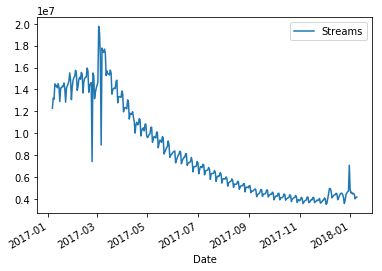

In [11]:
# task 4
#filter out Shape of You
df_new = df.loc[df['Track Name'].isin(['Shape of You'])]
df_new = df_new.groupby(['Artist','Track Name','Date']).sum()
df_new = df_new.reset_index()
#change date format
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%Y-%m-%d')
#plot
df_new.plot( x = 'Date',y='Streams')

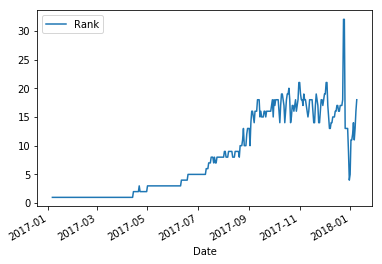

In [10]:
#grregate
df_new = df.groupby(['Date','Track Name','Artist']).sum()
df_new = df_new.reset_index()
#calculate rank
df_new['Rank'] = df_new.groupby('Date')['Streams'].rank(ascending=False)
df_new = df_new.loc[df_new['Track Name']=='Shape of You']
#change date format
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%Y-%m-%d')
#plot
df_new.plot(x='Date',y='Rank')